In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data1=pd.read_csv('train.csv')


In [3]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data1['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [5]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
data1.shape

(891, 12)

In [7]:
data1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
data1=data1.drop('Cabin',axis=1)

In [9]:
data1.shape

(891, 11)

In [10]:
data1['Age'].mode()

0    24.0
dtype: float64

In [11]:
data1['Age'].fillna(24.0,inplace=True)

In [12]:
data1['Embarked'].mode()

0    S
dtype: object

In [13]:
data1['Embarked'].fillna('S',inplace=True)

In [14]:
data1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

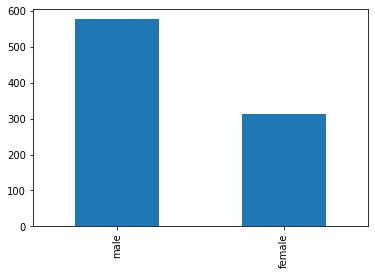

In [15]:
data1['Sex'].value_counts().plot(kind='bar')

In [16]:
data1['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [17]:
import seaborn as sns

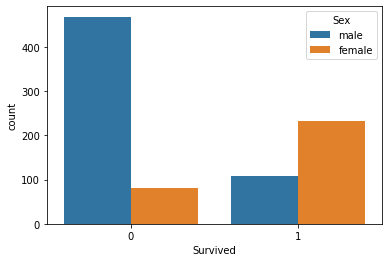

In [18]:
plot= sns.countplot(x='Survived',data=data1,hue='Sex')


In [19]:
data1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [20]:
d1=pd.get_dummies(data1['Sex'])
d1.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [21]:
d2=pd.get_dummies(data1['Embarked'])
d2.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
data1['Ticket'].value_counts()

347082               7
CA. 2343             7
1601                 7
347088               6
CA 2144              6
                    ..
349242               1
STON/O 2. 3101280    1
367231               1
113796               1
STON/O 2. 3101289    1
Name: Ticket, Length: 681, dtype: int64

In [23]:
data1=data1.drop('Ticket',axis=1)

In [24]:
data1['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [25]:
d3=pd.get_dummies(data1['Parch'],prefix='Parch')
d3.head()

,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [26]:
d4=pd.get_dummies(data1['SibSp'],prefix='Sibsp')
d4.head()

,Sibsp_0,Sibsp_1,Sibsp_2,Sibsp_3,Sibsp_4,Sibsp_5,Sibsp_8
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0


In [27]:
data1=data1.drop('Name',axis=1)

In [28]:
data_final = pd.concat([d1,d2,d3,d4,data1],axis=1)

In [29]:
data_final

,female,male,C,Q,S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,...,Sibsp_8,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,0,1,1,0,0,0,0,...,0,1,0,3,male,22.0,1,0,7.2500,S
1,1,0,1,0,0,1,0,0,0,0,...,0,2,1,1,female,38.0,1,0,71.2833,C
2,1,0,0,0,1,1,0,0,0,0,...,0,3,1,3,female,26.0,0,0,7.9250,S
3,1,0,0,0,1,1,0,0,0,0,...,0,4,1,1,female,35.0,1,0,53.1000,S
4,0,1,0,0,1,1,0,0,0,0,...,0,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,1,0,0,0,0,...,0,887,0,2,male,27.0,0,0,13.0000,S
887,1,0,0,0,1,1,0,0,0,0,...,0,888,1,1,female,19.0,0,0,30.0000,S
888,1,0,0,0,1,0,0,1,0,0,...,0,889,0,3,female,24.0,1,2,23.4500,S
889,0,1,1,0,0,1,0,0,0,0,...,0,890,1,1,male,26.0,0,0,30.0000,C


In [30]:
data_final.dtypes

female           uint8
male             uint8
C                uint8
Q                uint8
S                uint8
Parch_0          uint8
Parch_1          uint8
Parch_2          uint8
Parch_3          uint8
Parch_4          uint8
Parch_5          uint8
Parch_6          uint8
Sibsp_0          uint8
Sibsp_1          uint8
Sibsp_2          uint8
Sibsp_3          uint8
Sibsp_4          uint8
Sibsp_5          uint8
Sibsp_8          uint8
PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [31]:
data_final=data_final.drop('Sex',axis=1)

In [32]:
data_final=data_final.drop('Embarked',axis=1)

In [33]:
data_final=data_final.drop('SibSp',axis=1)

In [34]:
data_final=data_final.drop('Parch',axis=1)

In [35]:
data_final

,female,male,C,Q,S,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,...,Sibsp_2,Sibsp_3,Sibsp_4,Sibsp_5,Sibsp_8,PassengerId,Survived,Pclass,Age,Fare
0,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,3,22.0,7.2500
1,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,2,1,1,38.0,71.2833
2,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,3,1,3,26.0,7.9250
3,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,4,1,1,35.0,53.1000
4,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,5,0,3,35.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,887,0,2,27.0,13.0000
887,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,888,1,1,19.0,30.0000
888,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,889,0,3,24.0,23.4500
889,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,890,1,1,26.0,30.0000


In [36]:
data_final.dtypes

female           uint8
male             uint8
C                uint8
Q                uint8
S                uint8
Parch_0          uint8
Parch_1          uint8
Parch_2          uint8
Parch_3          uint8
Parch_4          uint8
Parch_5          uint8
Parch_6          uint8
Sibsp_0          uint8
Sibsp_1          uint8
Sibsp_2          uint8
Sibsp_3          uint8
Sibsp_4          uint8
Sibsp_5          uint8
Sibsp_8          uint8
PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
Fare           float64
dtype: object

In [37]:
data_final.isnull().sum()

female         0
male           0
C              0
Q              0
S              0
Parch_0        0
Parch_1        0
Parch_2        0
Parch_3        0
Parch_4        0
Parch_5        0
Parch_6        0
Sibsp_0        0
Sibsp_1        0
Sibsp_2        0
Sibsp_3        0
Sibsp_4        0
Sibsp_5        0
Sibsp_8        0
PassengerId    0
Survived       0
Pclass         0
Age            0
Fare           0
dtype: int64

In [38]:
data_final.shape

(891, 24)

In [39]:
import xgboost as xgb
from xgboost import XGBClassifier

In [40]:
x=data_final.drop(['Survived'],axis=1)
y=data_final['Survived']
x.shape,y.shape

((891, 23), (891,))

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.1,random_state=50)
seed=7

In [43]:
D_train=xgb.DMatrix(train_x,label=train_y)
D_test=xgb.DMatrix(test_x,label=test_y)

In [123]:
param={'eta':0.9,'max_depth':5,'objective':'multi:softprob','num_class':5,'gamma':20,'min_child_weight':20,'subsample':1,
    'cosample_bytree':0.5,'cosample_bynode':0.5,'cosample_bylevel':0.5,'lambda':2,'alpha':2,'tree_method':'hist','sketch_eps':0.03,
      'grow_policy':'lossguide','max_leaves':5,'max_bin':300}
steps=50

In [124]:
model=xgb.train(param,D_train,steps)

In [125]:
from sklearn.metrics import precision_score,recall_score,accuracy_score

In [126]:
preds=model.predict(D_test)
best_preds=np.asarray([np.argmax(line)for line in preds])
print("Precision={}".format(precision_score(test_y,best_preds,average="macro")))
print("Recall={}".format(recall_score(test_y,best_preds,average='macro')))
print("Accuracy={}".format(accuracy_score(test_y,best_preds)))

Precision=0.8251050420168067
Recall=0.8062840178129639
Accuracy=0.8111111111111111


In [93]:
model=XGBClassifier(learning_rate=0.05,n_estimators=300,max_depth=5)
model.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [94]:
y_pred=model.predict(test_x)
predictions=[round(value) for value in y_pred]

In [95]:
accuracy=accuracy_score(test_y,predictions)
print("ACcuracy: %.2f%%" % (accuracy * 100.0))

ACcuracy: 80.00%


In [96]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

In [102]:
thresholds=sort(model.feature_importances_)
for thresh in thresholds:
    selection=SelectFromModel(model , threshold=thresh,prefit=True)
    select_x_train=selection.transform(train_x)
    selection_model=XGBClassifier()
    selection_model.fit(select_x_train,train_y)
    select_x_test=selection.transform(test_x)
    y_pred=selection_model.predict(select_x_test)
    predictions=[round(value)for value in y_pred]
    accuracy=accuracy_score(test_y,predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_x_train.shape[1], accuracy*100.0))

Thresh=0.000, n=23, Accuracy: 80.00%
Thresh=0.000, n=23, Accuracy: 80.00%
Thresh=0.000, n=23, Accuracy: 80.00%
Thresh=0.000, n=23, Accuracy: 80.00%
Thresh=0.000, n=23, Accuracy: 80.00%
Thresh=0.000, n=23, Accuracy: 80.00%
Thresh=0.000, n=23, Accuracy: 80.00%
Thresh=0.008, n=16, Accuracy: 78.89%
Thresh=0.009, n=15, Accuracy: 81.11%
Thresh=0.012, n=14, Accuracy: 81.11%
Thresh=0.023, n=13, Accuracy: 81.11%
Thresh=0.025, n=12, Accuracy: 81.11%
Thresh=0.026, n=11, Accuracy: 80.00%
Thresh=0.030, n=10, Accuracy: 82.22%
Thresh=0.030, n=9, Accuracy: 81.11%
Thresh=0.030, n=8, Accuracy: 77.78%
Thresh=0.031, n=7, Accuracy: 76.67%
Thresh=0.033, n=6, Accuracy: 76.67%
Thresh=0.033, n=5, Accuracy: 77.78%
Thresh=0.060, n=4, Accuracy: 74.44%
Thresh=0.080, n=3, Accuracy: 74.44%
Thresh=0.157, n=2, Accuracy: 74.44%
Thresh=0.413, n=1, Accuracy: 81.11%
